**Machine Learning Capstone Project**

**Step 01 : Uploading the dataset**

In [ ]:
from google.colab import files


# Upload the file

uploaded = files.upload()


# Importing the library 'Pandas' to load and read the file

import pandas as pd

data = pd.read_csv("laptop.csv")



Saving laptop.csv to laptop.csv


**Step 02 : Inspecting the Dataset**

In [ ]:
# To check the first 5 rows of the dataset

print(data.head())



   Unnamed: 0.1  Unnamed: 0 Company   TypeName Inches  \
0             0         0.0   Apple  Ultrabook   13.3   
1             1         1.0   Apple  Ultrabook   13.3   
2             2         2.0      HP   Notebook   15.6   
3             3         3.0   Apple  Ultrabook   15.4   
4             4         4.0   Apple  Ultrabook   13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.3

In [ ]:
# To get a structural overview of the dataset

print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB
None


In [ ]:
# To get statistical summary of the dataset

print(data.describe())



       Unnamed: 0.1   Unnamed: 0          Price
count    1303.00000  1273.000000    1273.000000
mean      651.00000   652.674784   59955.814073
std       376.28801   376.493027   37332.251005
min         0.00000     0.000000    9270.720000
25%       325.50000   327.000000   31914.720000
50%       651.00000   652.000000   52161.120000
75%       976.50000   980.000000   79333.387200
max      1302.00000  1302.000000  324954.720000


**Step 03 : Data Cleaning**

In [ ]:
# Check for missing values

missing_values = data.isnull().sum()

print("Missing Values: \n" , missing_values)



Missing Values: 
 Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64


In [ ]:
# Drop unnecessary columns (e.g., Unnamed: 0)

data = data.drop(columns=['Unnamed: 0'])



In [ ]:
# Handle missing values

data = data.dropna()

**Step 04 : Data Pre-Processing**

In [ ]:
# Encoding categorical features by importing the class' LabelEncoder'

from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Company', 'TypeName', 'OpSys', 'Gpu', 'Cpu']

for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])



In [ ]:
# Converting 'Weight' column to numeric

#Ensure the 'Weight' column is treated as a string

data['Weight'] = data['Weight'].astype(str)


# Replace '?' with 0 before cleaning

data['Weight'] = data['Weight'].replace('?', float('0'))


# Remove any leading/trailing spaces and 'kg', then convert to float

data['Weight'] = data['Weight'].str.strip().str.replace('kg', '').astype(float)


# Handle NaN values by filling them with the mean

data['Weight'] = data['Weight'].fillna(data['Weight'].mean())


# Print the first few rows to verify the result

print(data['Weight'].head())



0   -0.876662
1   -0.913829
2   -0.269605
3   -0.306772
4   -0.876662
Name: Weight, dtype: float64


In [ ]:
# Standardize numerical columns by importing class ' StandardScalar'

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# Clean 'Inches' column

data['Inches'] = data['Inches'].astype(str)                       # Convert to string if not already
data['Inches'] = data['Inches'].replace('?', float('0'))          # Replace '?' with 0
data['Inches'] = data['Inches'].str.strip().astype(float)         # Convert to float (after cleaning)


# Define the numerical columns for scaling

num_cols = ['Inches', 'Weight']

# Apply standardization

data[num_cols] = scaler.fit_transform(data[num_cols])

# Step 5: Print first few rows to check the result

print(data[num_cols].head())



     Inches    Weight
0 -0.937118 -0.876662
1 -0.937118 -0.913829
2  0.240155 -0.269605
3  0.137783 -0.306772
4 -0.937118 -0.876662


**Step 05 : Exploratory Data Analysis**

In [ ]:
# Importing the 'Seaborn' Library and 'pyplot' class from 'Matplotlib' Library

import seaborn as sns
import matplotlib.pyplot as plt



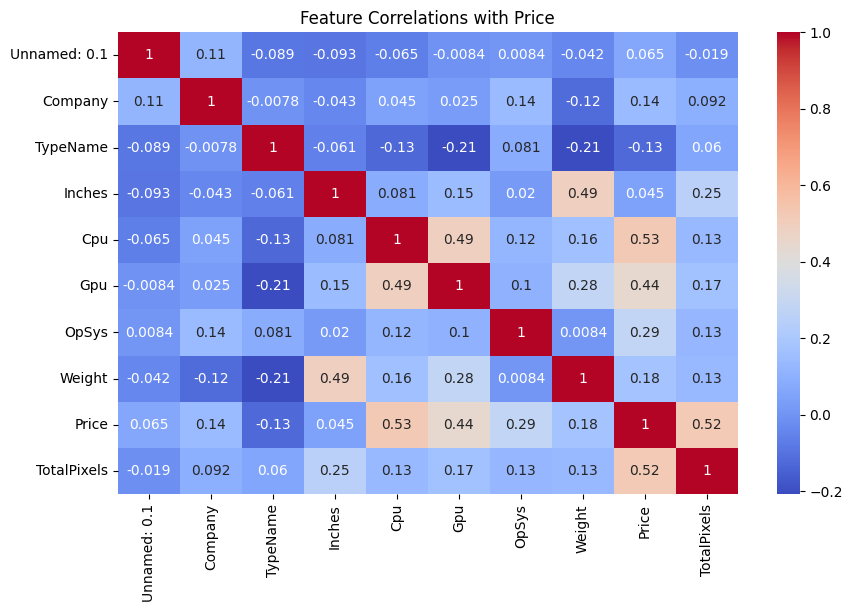

In [ ]:
# Correlation heatmap

# Creates a figure of size 10 x 6 inches

plt.figure(figsize=(10, 6))


# Select only numerical columns from the dataset

numeric_data = data.select_dtypes(include=['float64', 'int64'])


# Creates a heatmap to visualize correlation matrix

sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')


plt.title("Feature Correlations with Price")

plt.show()



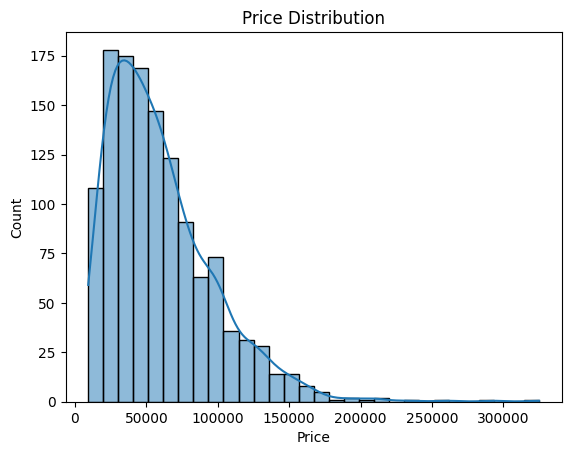

In [ ]:
# Distribution of Price

# Creates histogram to visualize distribution of single variable

sns.histplot(data['Price'], kde=True, bins=30)


plt.title("Price Distribution")

plt.show()



**Step 06 : Feature Engineering**

In [ ]:
print(data.columns)

Index(['Unnamed: 0.1', 'Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight', 'Price', 'TotalPixels'],
      dtype='object')


**Step 07 : Model Development**

In [ ]:
# Importing the 'Train Test Split' function from the 'Model Selection' module of 'sklearn' Library to help split your data into training and testing sets

from sklearn.model_selection import train_test_split


# Importing the 'Linear Regression' class from the 'Linear Model' module of 'sklearn' Library to create a linear regression model

from sklearn.linear_model import LinearRegression


# Importing the 'Random Forest Regressor' class from the 'Ensemble' module of 'sklearn' Library to create a random forest regression model

from sklearn.ensemble import RandomForestRegressor


# Importing the 'Mean Squared Error (MSE)' and 'R2 Score' functions from the 'Metrics' module of 'sklearn' Library to evaluate the performance of models

from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
# Splitting the data into 'x' and 'y' features


X = data.drop(columns=['Price'])

y = data['Price']


# Apply one-hot encoding to categorical features

X = pd.get_dummies(X, drop_first=True)     # Drop the first category



In [ ]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Linear Regression Model

from sklearn.impute import SimpleImputer


# Handle missing values by imputation (using the mean strategy)

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Initialize the Linear Regression model
lr = LinearRegression()


# Fit the model to the training data
lr.fit(X_train, y_train)


# Make predictions on the test set
lr_preds = lr.predict(X_test)



In [ ]:
# Random Forest Regressor Model


# Initialize the Random Forest Regressor model
rf = RandomForestRegressor()

# FIt the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
rf_preds = rf.predict(X_test)



**Step 08 : Evaluating the performances of the Model**

In [ ]:
# Evaluating the performance of Linear Regression Model

import numpy as np


print('Linear Regression:')

print('RMSE:', np.sqrt(mean_squared_error(y_test, lr_preds)))

print('R2 Score:', r2_score(y_test, lr_preds))



Linear Regression:
RMSE: 26436.427748477774
R2 Score: 0.5182360762508089


In [ ]:
# Evaluating the performance of Random Forest Regressor Model

print('Random Forest Regressor:')

print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_preds)))

print('R2 Score:', r2_score(y_test, rf_preds))



Random Forest Regressor:
RMSE: 18820.938828528495
R2 Score: 0.755819318706619


**Step 09 : Comparing the Models**

In [ ]:
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor'],

    'RMSE': [np.sqrt(mean_squared_error(y_test, lr_preds)),
              np.sqrt(mean_squared_error(y_test, rf_preds))],

    'R2 Score': [
        r2_score(y_test, lr_preds),
        r2_score(y_test, rf_preds)]
})

print(model_comparison)


                     Model          RMSE  R2 Score
0        Linear Regression  26436.427748  0.518236
1  Random Forest Regressor  18820.938829  0.755819


**Step 10 : Hyperparamter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the Hyperparamter Grid

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}


# Setting up Grid Search CV

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)


# Fitting the Model

grid_search.fit(X_train, y_train)


# Selecting the Best Model

best_rf = grid_search.best_estimator_


# Making predictions and evaluating the Tuned Model

best_rf_preds = best_rf.predict(X_test)
mse = mean_squared_error(y_test, best_rf_preds)
rmse = np.sqrt(mse)
print("Tuned Random Forest RMSE:", rmse)



Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.6s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.9s
[CV] END ...................max_depth=None, n_estimators=100; total time=   1.0s
[CV] END ...................max_depth=None, n_estimators=200; total time=   3.9s
[CV] END ...................max_depth=None, n_estimators=200; total time=   2.2s
[CV] END ...................max_depth=None, n_estimators=200; total time=   1.7s
[CV] END .....................max_depth=10, n_estimators=100; total time=   1.1s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.8s
[CV] END .....................max_depth=10, n_estimators=100; total time=   0.4s
[CV] END .....................max_depth=10, n_estimators=200; total time=   0.8s
[CV] END .....................max_depth=10, n_estimators=200; total time=   0.8s
[CV] END .....................max_depth=10, n_est